In [9]:
from pymatgen.phonon.bandstructure import *
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import*
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mp_key = "x6hAWrx1l7nO3pcKMHzrj9I3u9zQTpCo"
mp_id = "mp-924130"

In [10]:
m = MPRester(mp_key)
phonon_band = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Représentation de la structure de bande de phonon du TiNiSn

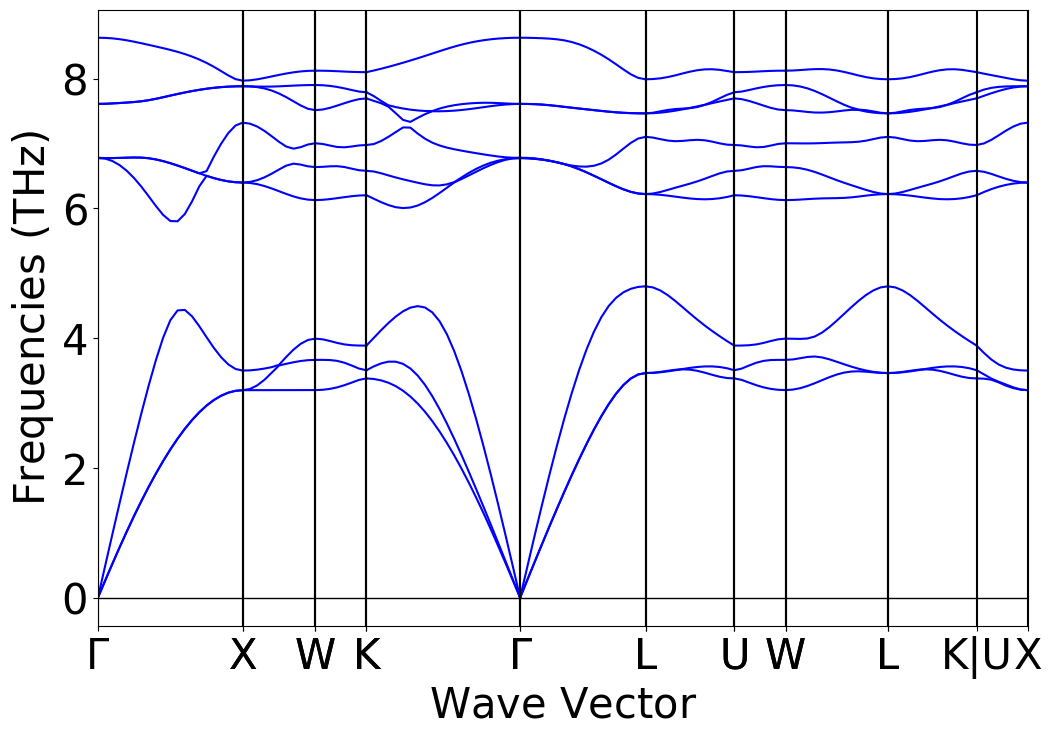

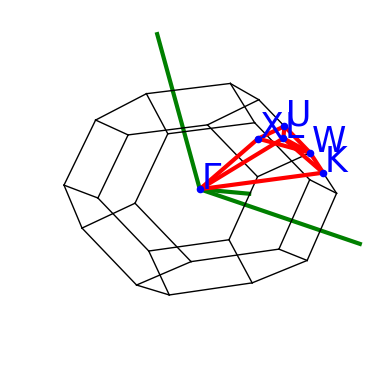

In [12]:
plot = PhononBSPlotter(phonon_band)
plot.get_plot()
plot.plot_brillouin()

# Calcul de la vitesse du son

### Récupération des données et choix des branches et directions

In [16]:
# Récupération des datas
data = plot.bs_plot_data()
distances = data.get("distances")
frequencies = data.get("frequency")

10


In [62]:
# Récupération des fréquences pour 3 branches acoustiques différentes dans 3 directions différentes
directions = [0, 3, 4]  # choix arbitraire des directions
branches = [0, 1, 2]  # choix arbitraire des branches
freq1 = frequencies[directions[0]][branches[0]]
freq2 = frequencies[directions[1]][branches[1]]
freq3 = frequencies[directions[2]][branches[2]]
dist1 = distances[directions[0]]
dist2 = distances[directions[1]]
dist3 = distances[directions[2]]

### Représentation des branches et directions acoustiques analysées

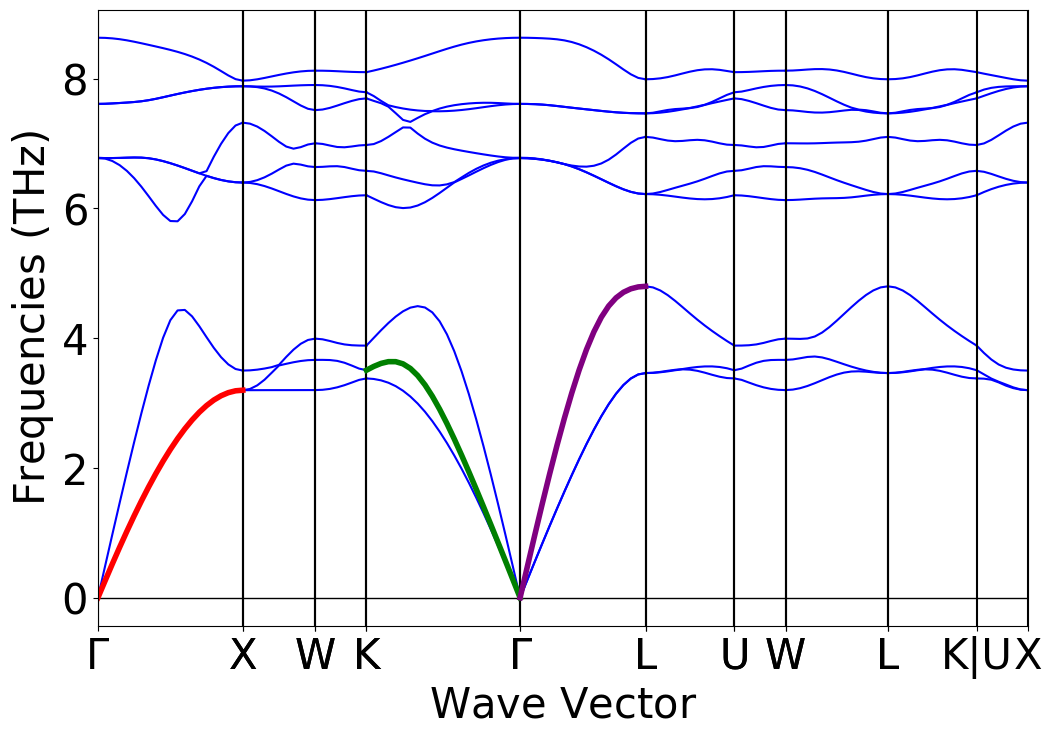

In [63]:
plot = PhononBSPlotter(phonon_band)
plot.get_plot()
plt.plot(dist1, freq1, "red", linewidth=4)
plt.plot(dist2, freq2, "green", linewidth=4)
plt.plot(dist3, freq3, "purple", linewidth=4)

### Calcul

Avec $\omega = 2 * \pi * f$ la relation de dispersion, la vitesse du son peut être calculée en prenant la dérivée de la relation de dispersion par rapport au vecteur d'onde $q$, donc $v = \frac{\partial \omega}{\partial q}$. C'est valable tant que nous sommes dans le cas des grandes longueurs d'onde : $\lambda >> a$ où $a$ est le paramètre de maille.

In [64]:
# Donne approximation de la vitesse du son sur la branche et dans la direction voulue
# Marche correctement tant que la courbe est proche d'une droite sur la direction analysée
def vson(freq, q):  # facteur 2 * pi car argument donnée en fréquence [1/s] et non en pulsation [rad/s]
    return 2 * np.pi * np.abs((freq[-1]-freq[0])*10**12)/((q[-1]-q[0])*10**10)


vson1 = vson(freq1, dist1)
vson2 = vson(freq2, dist2)
vson3 = vson(freq3, dist3)
direction_zone = {0 : "\u0393 - X", 1 : "X - W", 2 : "W - \u004B", 3 : "\u004B - \u0393", 4 : "\u0393 - L", 5 : "L - U", 6 : "U - W", 7 : "W - L", 8 : "L - K", 9 : "K - UX"}

print(f"La vitesse du son dans la branche {branches[0]} dans la direction {direction_zone[directions[0]]} est {vson1} m/s")
print(f"La vitesse du son dans la branche {branches[1]} dans la direction {direction_zone[directions[1]]} est {vson2} m/s")
print(f"La vitesse du son dans la branche {branches[2]} dans la direction {direction_zone[directions[2]]} est {vson3} m/s")
print("Le matériau est anisotrope donc la vitesse du son n'est pas la même dans toutes les directions, comme nos calculs l'indiquent.")

La vitesse du son dans la branche 0 dans la direction Γ - X est 1878.8236624104861 m/s
La vitesse du son dans la branche 1 dans la direction K - Γ est 1941.8006923047442 m/s
La vitesse du son dans la branche 2 dans la direction Γ - L est 3255.2614124713436 m/s
Le matériau est anisotrope donc la vitesse du son n'est pas la même dans toutes les directions, comme nos calculs l'indiquent.


### Représentation des vitesses du son sur les branches et directions analysées

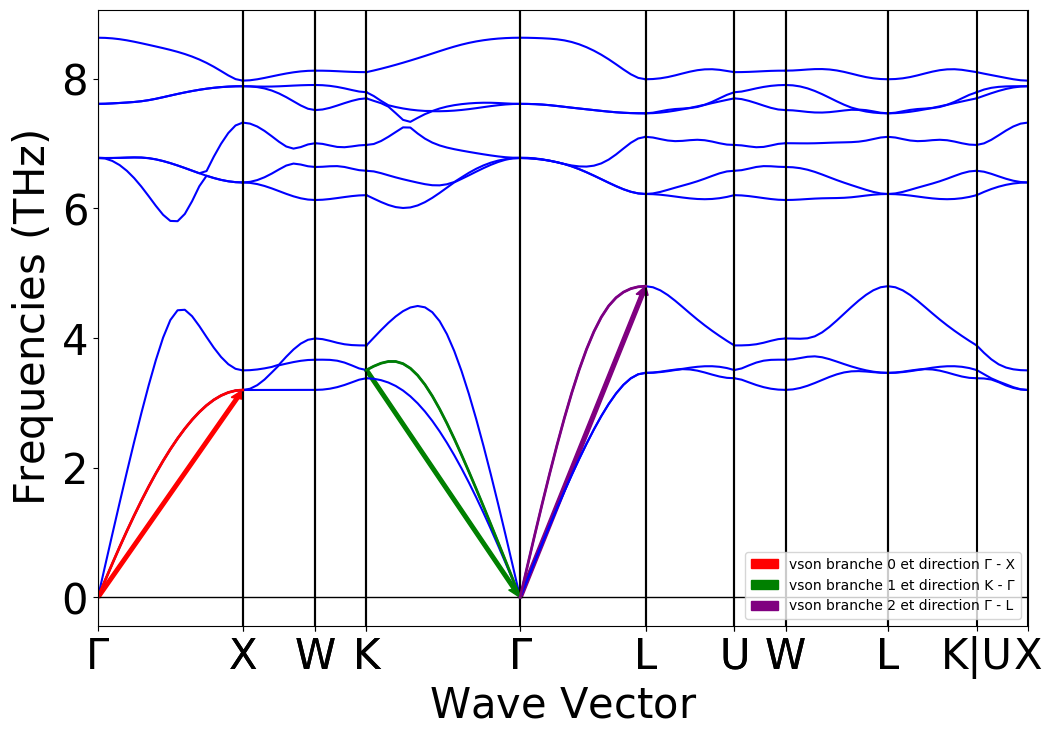

In [65]:
plot = PhononBSPlotter(phonon_band)
plot.get_plot()
plt.plot(dist1, freq1, "red", linewidth=2)
plt.plot(dist2, freq2, "green", linewidth=2)
plt.plot(dist3, freq3, "purple", linewidth=2)
plt.arrow(dist1[0], freq1[0], dist1[-1] - dist1[0], freq1[-1] - freq1[0], color='red',width = 0.03,length_includes_head =True, label= f"vson branche {branches[0]} et direction {direction_zone[directions[0]]}")
plt.arrow(dist2[0], freq2[0], dist2[-1] - dist2[0], freq2[-1] - freq2[0], color='green',width = 0.03,length_includes_head =True, label= f"vson branche {branches[1]} et direction {direction_zone[directions[1]]}")
plt.arrow(dist3[0], freq3[0], dist3[-1] - dist3[0], freq3[-1] - freq3[0], color='purple',width = 0.03,length_includes_head =True, label= f"vson branche {branches[2]} et direction {direction_zone[directions[2]]}")
plt.legend()